In [12]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('../data/raw_data/PJMW_hourly.csv', parse_dates=['Datetime'], index_col='Datetime')

In [7]:
df

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077.0
2002-12-31 02:00:00,4939.0
2002-12-31 03:00:00,4885.0
2002-12-31 04:00:00,4857.0
2002-12-31 05:00:00,4930.0
...,...
2018-01-01 20:00:00,8401.0
2018-01-01 21:00:00,8373.0
2018-01-01 22:00:00,8238.0


In [9]:
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=143206, freq=None)

<Axes: xlabel='Datetime'>

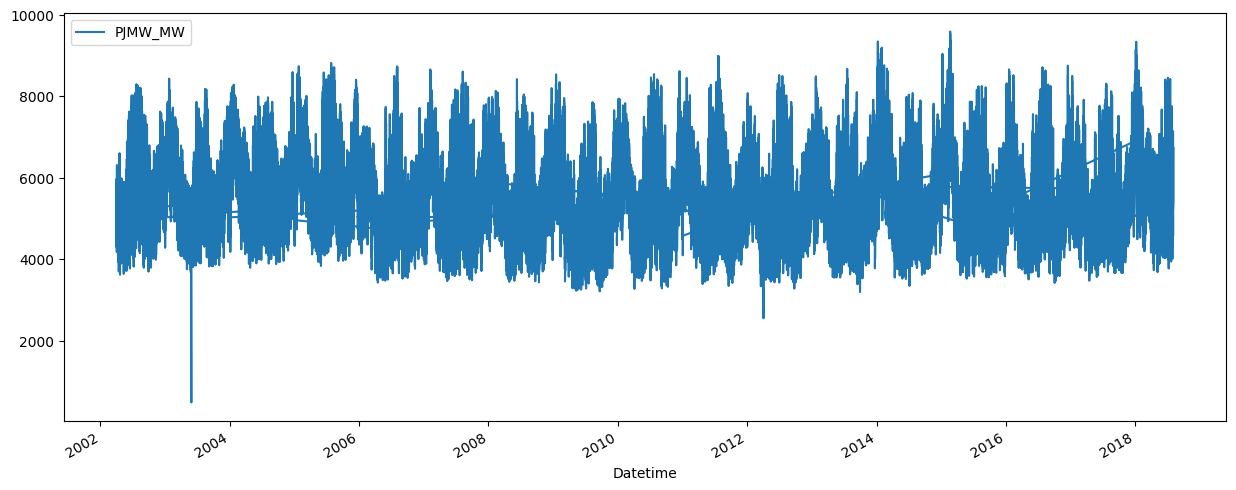

In [11]:
df.plot(figsize=(15, 6))

In [13]:
# Define the column to clean
col = 'PJMW_MW'

# Compute IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

# Replace outliers with NaN
df.loc[outliers, col] = np.nan

# Use time-based interpolation to fill in missing values
df[col] = df[col].interpolate(method='time')

# Save the cleaned dataset
cleaned_file_path = "../data/processed/cleaned_PJMW_hourly.csv"
df.to_csv(cleaned_file_path)

In [14]:
df_cleaned = pd.read_csv(cleaned_file_path, parse_dates=['Datetime'], index_col='Datetime')

<Axes: xlabel='Datetime'>

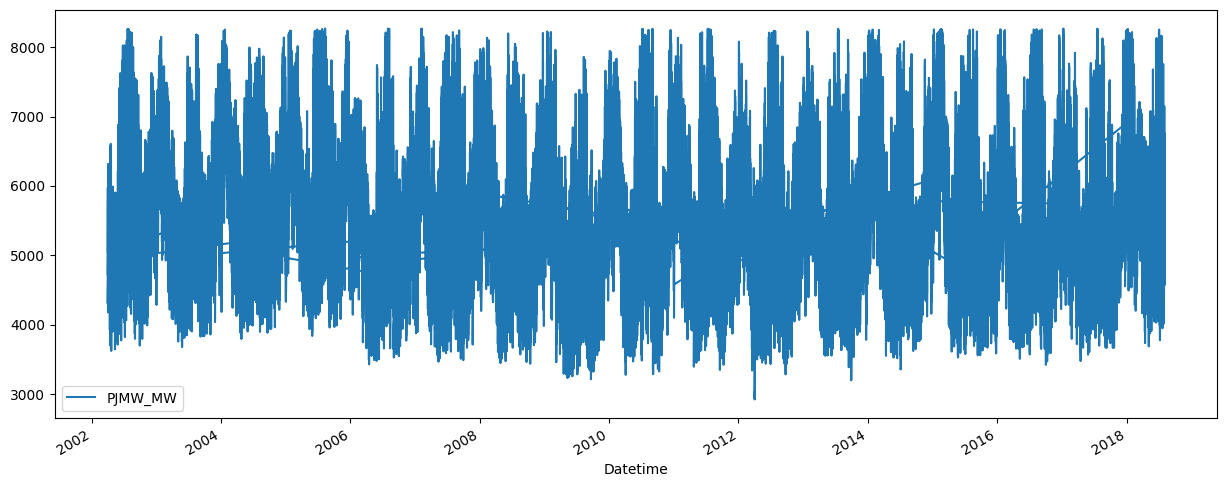

In [15]:
df_cleaned.plot(figsize=(15, 6))

array([[<Axes: title={'center': 'PJMW_MW'}>]], dtype=object)

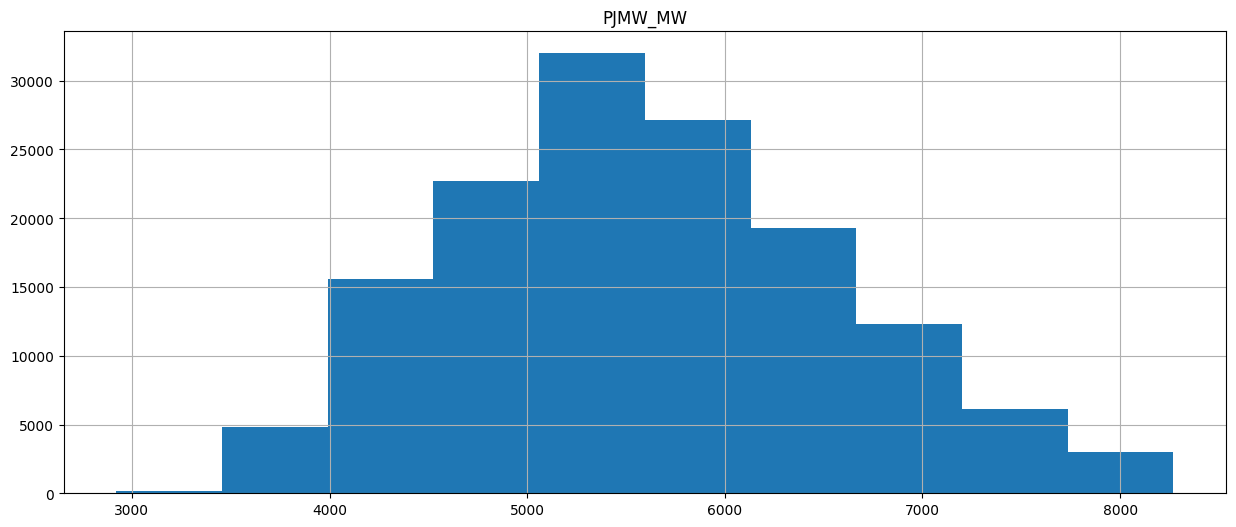

In [16]:
df.hist(figsize=(15, 6))